<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/b/b6/Proyecto_en_construccion.jpg" width="300px" height="100px" />


# Guía para presentación de proyectos.
> Se especifican los componentes básicos que deberá tener cada proyecto. El proyecto debe ser un problema que se pueda modelar con las herramientas vistas en el módulo. En el caso del primer módulo, optimización.

## 2.2 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación en power point para presentar el trabajo en la clase del **Miércoles 20 de Septiembre**. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

## 1.1 Ajuste de curva de Intereses Pagados por el Gobierno

### 1.2 Objetivos.
> Identificar la tendencia principal de la grafica de los intereses.

> Identificar como cada año incrementan los intereses de la deuda gubernamental

> Poder ajustar una curva que optimize los datos que nos dan en la grafica y minimizar el error


### 1.3 Introducción

>En este problema realizaremos un análisis sobre una gráfica de los intereses de la deuda gubernamental, después se realizará una optimización y ajustaremos una curva que minimize el error de esta gráfica y así poder predecir la tendencia a futuro

### Pagos de intereses (en moneda local actual) - México

Los datos de finanzas del gobierno central están consolidados en una cuenta única en la mayoría de los países, pero algunos solo proporcionan información sobre las cuentas presupuestarias del gobierno central. Esto puede llevar a una imagen incompleta, ya que las cuentas presupuestarias a menudo excluyen unidades como fondos de seguridad social. En estados federales, las cuentas del gobierno central no reflejan completamente las finanzas públicas totales. El Fondo Monetario Internacional (FMI) recopila estos datos a través de cuestionarios a los países miembros y la Organización para la Cooperación y el Desarrollo Económicos (OCDE). Sin embargo, a pesar de los esfuerzos del FMI por estandarizar la recopilación de datos, las estadísticas pueden ser incompletas, desactualizadas y no comparables entre países.

Los pagos de intereses abarcan los pagos de intereses sobre la deuda gubernamental, que incluye bonos a largo plazo, préstamos a largo plazo y otros instrumentos de deuda, tanto a residentes nacionales como extranjeros. Esta información se presenta anualmente. El método de contabilidad recomendado por el FMI se basa en la acumulación, teniendo en cuenta todos los eventos económicos que afectan a activos, pasivos, ingresos y gastos, no solo las transacciones en efectivo. Esto implica contabilizar todos los cambios en los inventarios, lo que significa que los datos de inventarios al final de un período contable son iguales a los datos al principio, más los flujos durante el período. En contraste, el manual de 1986 solo consideraba los inventarios de deuda. Los datos de finanzas del gobierno se informan en moneda local y muchos países lo hacen en base al año fiscal, cuyos detalles específicos se encuentran en los metadatos del país.

### 1.4 Modelo que representa el problema.

> - Se debe incluir la función a optimizar y las restricciones (en caso de que existan).
> - Deducción del modelo. Explicación detallada de las ecuaciones de acuerdo al problema que se quiera resolver o modelo que se quiera representar.
> - ¿Qué situación representa el modelo? ¿Cuáles son las limitaciones fundamentales?
> - Significado y valor de los parámetros (constantes que aparezcan en el modelo).

### 1.5 Solución del problema de optimización.

In [2]:
# Cargar librerias que se usarán
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

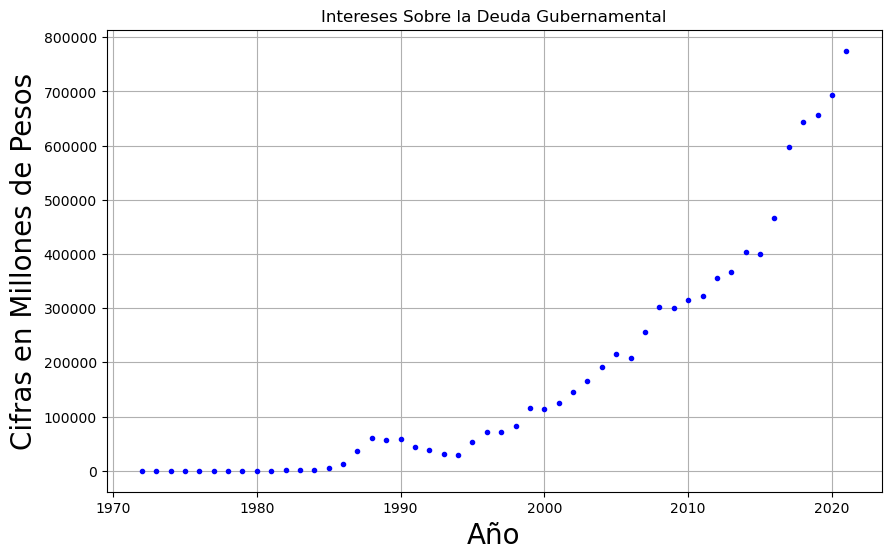

In [3]:
# Datos proporcionados
x = np.arange(1972, 2022)
y = np.array([5,7,11,14,20,32,41,53,75,169,417,1603,2259,4364,11591,35559,61117,57396,59466,43244,37943,30421,28490,53008,72287,70709,82917,115894,113161,125596,145674,165418,192145,215967,208698,255967,302999,300526,314151,322243,355665,367399,402738,400293,465695,597090,642805,655783,693873,775108])

# Graficamos los datos
plt.figure(figsize =(10,6))
plt.plot(x,y,'.b')

plt.title('Intereses Sobre la Deuda Gubernamental')
plt.xlabel('Año',fontsize = 20)
plt.ylabel('Cifras en Millones de Pesos',fontsize = 20)

plt.grid()
plt.show()


In [4]:
#Preprocesamiento de los datos
min_x1, min_y1 = min(x), min(y)
max_x1, max_y1 = max(x), max(y)

x_norm = (x - max_x1)/(max_x1 - min_x1)
y_norm = (y - min_y1)/(max_y1 - min_y1)

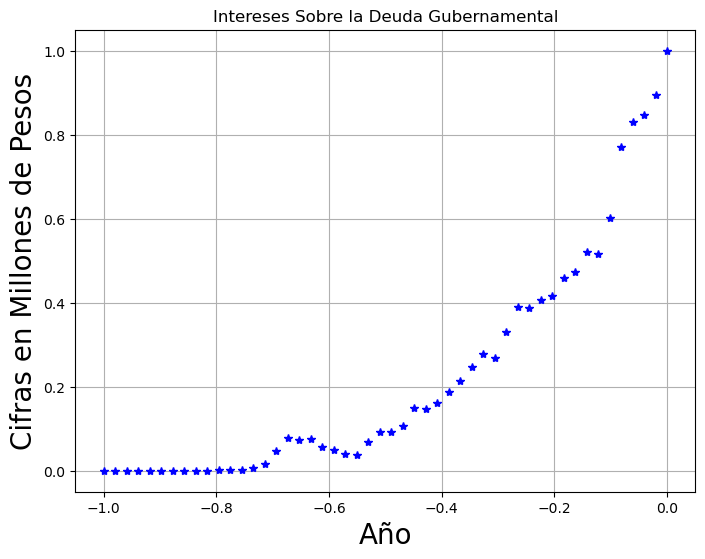

In [5]:
# Graficamos los datos normalizados
plt.figure(figsize =(8,6))
plt.plot(x_norm,y_norm,'*b')

plt.title('Intereses Sobre la Deuda Gubernamental')
plt.xlabel('Año',fontsize = 20)
plt.ylabel('Cifras en Millones de Pesos',fontsize = 20)

plt.grid()
plt.show()

In [18]:
# Definir funcion objetivo y semilla
def obj_n(beta, x, y, n):
    yhat = beta.dot([x**i for i in range(n)])
    error = y-yhat
    return np.sum(error**2)
n = 4
beta_inicial = np.zeros(n)

In [19]:
# Resolver
sol3 = opt.minimize(obj_n, beta_inicial, args=(x_norm,y_norm, n))
sol3

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.04192736911322362
        x: [ 9.625e-01  3.306e+00  3.968e+00  1.642e+00]
      nit: 12
      jac: [ 2.934e-07  4.247e-07 -2.136e-06  3.305e-06]
 hess_inv: [[ 1.376e-01  1.024e+00  2.029e+00  1.171e+00]
            [ 1.024e+00  1.054e+01  2.376e+01  1.471e+01]
            [ 2.029e+00  2.376e+01  5.729e+01  3.700e+01]
            [ 1.171e+00  1.471e+01  3.700e+01  2.460e+01]]
     nfev: 75
     njev: 15

In [20]:
# Mostrar coeficientes
beta3 = sol3.x
beta3

array([0.96248484, 3.30623753, 3.96848294, 1.6422398 ])

### 1.6 Visualización de la solución del problema.

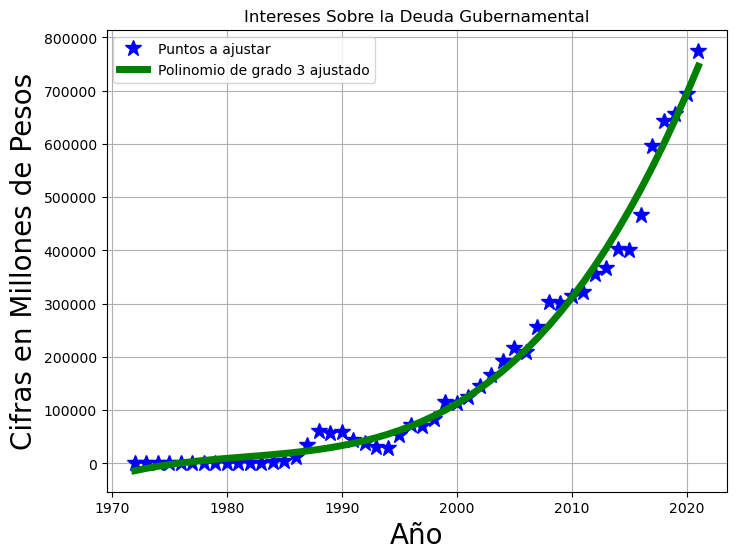

In [21]:
yhat3 = (beta3.dot([x_norm**i for i in range(n)]))*(max_y1 - min_y1) + min_y1  # Para volver a la escala inicial

# Graficar
plt.figure(figsize=(8,6))

#Agregar puntos y línea ajustada
plt.plot(x,y,'*b',ms = 12, label='Puntos a ajustar')
plt.plot(x,yhat3,'g',lw=5,label='Polinomio de grado 3 ajustado')

plt.title('Intereses Sobre la Deuda Gubernamental')
plt.xlabel('Año',fontsize = 20)
plt.ylabel('Cifras en Millones de Pesos',fontsize = 20)

plt.grid()
plt.legend(loc='best')
plt.show()

### 1.7 Conclusiones.
> Como podemos observar en la curva, la tendencia que tiene esta grafica es que esta creciendo de manera exponencial, esto puede ser por varios motivos pero uno de los principales es que el gobierno cada año aumenta su deuda para financiar nuevos proyectos, también otro de los factores es la inflación que aumenta año con año y también otro es que las tasas de interés estan subiendo y esto hace que sea más caro el financiamiento

> También como conclusión del trabajo es que no le habia encontrado algunas aplicaciones a esta materia pero poco a poco me voy dando cuenta que te puede ayudar en demasiados temas el saber programar, y creo que en mi carrera se verá demasiado la programación y con esto me doy cuenta que te ahorras demasiado tiempo en realizar tus trabajos

### 1.8 Referencias.
> World Bank Open Data. (s. f.). World Bank Open Data. https://data.worldbank.org/indicator/GC.XPN.INTP.CN?locations=MX&view=chart